# Part 1 - Identify the Frauds with the Self-Organizing Map

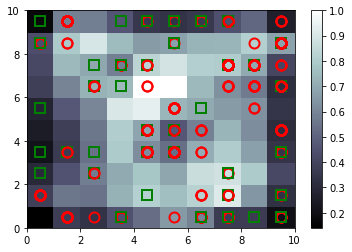

In [1]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [2]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(7,1)], mappings[(7,2)]), axis = 0)
frauds = sc.inverse_transform(frauds)


In [3]:
frauds

array([[1.5808662e+07, 0.0000000e+00, 4.6000000e+01, 4.0000000e+00,
        2.0000000e+00, 5.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0000000e+02, 9.6100000e+02],
       [1.5731166e+07, 1.0000000e+00, 4.0920000e+01, 8.3500000e-01,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.3000000e+02, 2.0000000e+00],
       [1.5757188e+07, 0.0000000e+00, 2.0830000e+01, 3.0000000e+00,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 4.0000000e-02,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0000000e+02, 1.0000000e+00],
       [1.5776545e+07, 0.0000000e+00, 2.5000000e+01, 1.1000000e+01,
        1.0000000e+00, 6.0000000e+00, 4.0000000e+00, 4.5000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

# Part 2 - Going from Unsupervised to Supervised Deep Learning

In [4]:
# Creating the matrix of features
customers = dataset.iloc[:, 1:].values

In [5]:
customers

array([[1.000e+00, 2.208e+01, 1.146e+01, ..., 1.000e+02, 1.213e+03,
        0.000e+00],
       [0.000e+00, 2.267e+01, 7.000e+00, ..., 1.600e+02, 1.000e+00,
        0.000e+00],
       [0.000e+00, 2.958e+01, 1.750e+00, ..., 2.800e+02, 1.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 1.883e+01, 9.540e+00, ..., 1.000e+02, 1.000e+00,
        1.000e+00],
       [0.000e+00, 2.742e+01, 1.450e+01, ..., 1.200e+02, 1.200e+01,
        1.000e+00],
       [1.000e+00, 4.100e+01, 4.000e-02, ..., 5.600e+02, 1.000e+00,
        1.000e+00]])

In [6]:
# Creating the dependent variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [7]:
is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [9]:
# Now let's make the ANN!

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Using TensorFlow backend.


Epoch 1/2
690/690 [==============================] - 4s 6ms/step - loss: 0.4449 - accuracy: 0.9812
Epoch 2/2
690/690 [==============================] - 3s 5ms/step - loss: 0.1392 - accuracy: 0.9812


In [11]:
# Predicting the probabilities of frauds
y_pred = classifier.predict(customers)
y_pred

array([[0.0411153 ],
       [0.04168393],
       [0.02894815],
       [0.07769623],
       [0.05849559],
       [0.07541337],
       [0.03996532],
       [0.04346978],
       [0.03378056],
       [0.06463962],
       [0.04603138],
       [0.04629945],
       [0.0596083 ],
       [0.0330995 ],
       [0.0332019 ],
       [0.09441316],
       [0.05679529],
       [0.08288061],
       [0.03070807],
       [0.05683519],
       [0.0370389 ],
       [0.05129416],
       [0.0361908 ],
       [0.06751209],
       [0.04635477],
       [0.04374268],
       [0.02914659],
       [0.09161178],
       [0.07255832],
       [0.05704237],
       [0.06220473],
       [0.03632429],
       [0.05692009],
       [0.04587605],
       [0.0340906 ],
       [0.0942435 ],
       [0.13230264],
       [0.03751768],
       [0.03661376],
       [0.03196998],
       [0.1134105 ],
       [0.03049269],
       [0.10741642],
       [0.07112568],
       [0.04361823],
       [0.05924067],
       [0.0389987 ],
       [0.059

In [12]:
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred

array([[1.57761560e+07, 4.11153026e-02],
       [1.57395480e+07, 4.16839309e-02],
       [1.56628540e+07, 2.89481468e-02],
       ...,
       [1.56754500e+07, 1.26450524e-01],
       [1.57764940e+07, 4.87605594e-02],
       [1.55924120e+07, 7.02108443e-02]])

In [13]:
y_pred = y_pred[y_pred[:, 1].argsort()]
y_pred

array([[1.57997850e+07, 5.97768044e-03],
       [1.56214230e+07, 6.54830132e-03],
       [1.56548590e+07, 1.35879908e-02],
       ...,
       [1.57486490e+07, 1.41095504e-01],
       [1.57845260e+07, 1.52633131e-01],
       [1.55695950e+07, 1.61631241e-01]])